## 1. Meet Professor William Sharpe
<p>An investment may make sense if we expect it to return more money than it costs. But returns are only part of the story because they are risky - there may be a range of possible outcomes. How does one compare different investments that may deliver similar results on average, but exhibit different levels of risks?</p>
<p><img style="float: left ; margin: 5px 20px 5px 1px;" width="200" src="https://assets.datacamp.com/production/project_66/img/sharpe.jpeg"></p>
<p>Enter William Sharpe. He introduced the <a href="https://web.stanford.edu/~wfsharpe/art/sr/sr.htm"><em>reward-to-variability ratio</em></a> in 1966 that soon came to be called the Sharpe Ratio. It compares the expected returns for two investment opportunities and calculates the additional return per unit of risk an investor could obtain by choosing one over the other. In particular, it looks at the difference in returns for two investments and compares the average difference to the standard deviation (as a measure of risk) of this difference. A higher Sharpe ratio means that the reward will be higher for a given amount of risk. It is common to compare a specific opportunity against a benchmark that represents an entire category of investments.</p>
<p>The Sharpe ratio has been one of the most popular risk/return measures in finance, not least because it's so simple to use. It also helped that Professor Sharpe won a Nobel Memorial Prize in Economics in 1990 for his work on the capital asset pricing model (CAPM).</p>
<p>The Sharpe ratio is usually calculated for a portfolio and uses the risk-free interest rate as benchmark. We will simplify our example and use stocks instead of a portfolio. We will also use a stock index as benchmark rather than the risk-free interest rate because both are readily available at daily frequencies and we do not have to get into converting interest rates from annual to daily frequency. Just keep in mind that you would run the same calculation with portfolio returns and your risk-free rate of choice, e.g, the <a href="https://fred.stlouisfed.org/series/TB3MS">3-month Treasury Bill Rate</a>. </p>
<p>So let's learn about the Sharpe ratio by calculating it for the stocks of the two tech giants Facebook and Amazon. As benchmark we'll use the S&amp;P 500 that measures the performance of the 500 largest stocks in the US. When we use a stock index instead of the risk-free rate, the result is called the Information Ratio and is used to benchmark the return on active portfolio management because it tells you how much more return for a given unit of risk your portfolio manager earned relative to just putting your money into a low-cost index fund.</p>

In [113]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading in the data
stock_data = pd.read_csv('datasets/stock_data.csv')
benchmark_data = pd.read_csv('datasets/benchmark_data.csv')

## 2. A first glance at the data
<p>Let's take a look the data to find out how many observations and variables we have at our disposal.</p>

In [3]:
# Display summary for stock_data
print('Stocks\n')

stock_data.info()
print(stock_data.head())

# Display summary for benchmark_data
print('\nBenchmarks\n')
benchmark_data.info()
benchmark_data.head()

Stocks

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      252 non-null    object 
 1   Amazon    252 non-null    float64
 2   Facebook  252 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.0+ KB
         Date      Amazon    Facebook
0  2016-01-04  636.989990  102.220001
1  2016-01-05  633.789978  102.730003
2  2016-01-06  632.650024  102.970001
3  2016-01-07  607.940002   97.919998
4  2016-01-08  607.049988   97.330002

Benchmarks

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     261 non-null    object 
 1   S&P 500  252 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


,Date,S&P 500
0,2016-01-01,NaN
1,2016-01-04,2012.66
2,2016-01-05,2016.71
3,2016-01-06,1990.26
4,2016-01-07,1943.09


## 3. Plot & summarize daily prices for Amazon and Facebook
<p>Before we compare an investment in either Facebook or Amazon with the index of the 500 largest companies in the US, let's visualize the data, so we better understand what we're dealing with.</p>

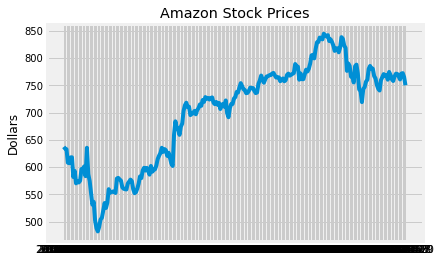

min: 482.070007 max: 844.3599849999999
 total return over time: 1.751529804259322


In [4]:
# visualize the stock_data
# ... YOUR CODE FOR TASK 3 HERE ...
plt.plot('Date', 'Amazon', data=stock_data)
plt.title("Amazon Stock Prices")
plt.ylabel("Dollars")
plt.show()
# summarize the stock_data
# ... YOUR CODE FOR TASK 3 HERE ...
print( 'min: ' + str(min(stock_data.Amazon)) \
      + " max: " + str(max(stock_data.Amazon))\
     + "\n total return over time: " + str(max(stock_data.Amazon)/min(stock_data.Amazon))
     )

## 4. Visualize & summarize daily values for the S&P 500
<p>Let's also take a closer look at the value of the S&amp;P 500, our benchmark.</p>

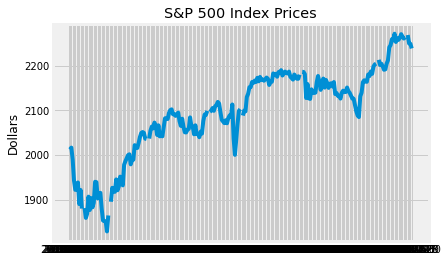

min: 1829.08 max: 2271.72
  total returns over time :1.2420014433485687


In [5]:
plt.plot('Date', 'S&P 500', data=benchmark_data)
plt.title("S&P 500 Index Prices")
plt.ylabel("Dollars")
plt.show()
# summarize the stock_data
# ... YOUR CODE FOR TASK 3 HERE ...
benchmark_data =benchmark_data.dropna()
print( 'min: ' + str(min(benchmark_data['S&P 500'])) \
      + " max: " + str(max(benchmark_data['S&P 500'])) \
        + "\n  total returns over time :" + str(max(benchmark_data['S&P 500'])/min(benchmark_data['S&P 500']))\
     )


## 5. The inputs for the Sharpe Ratio: Starting with Daily Stock Returns
<p>The Sharpe Ratio uses the difference in returns between the two investment opportunities under consideration.</p>
<p>However, our data show the historical value of each investment, not the return. To calculate the return, we need to calculate the percentage change in value from one day to the next. We'll also take a look at the summary statistics because these will become our inputs as we calculate the Sharpe Ratio. Can you already guess the result?</p>

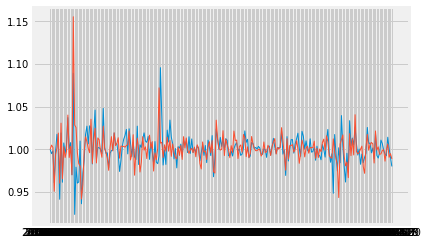

In [78]:
# calculate daily stock_data returns
#stock_returns = ...

AMZN_d=[1]
FB_d = [1]
for i in range(1,len(stock_data)):
    FB_d.append(stock_data['Facebook'][i]/stock_data['Facebook'][i-1])
    AMZN_d.append(stock_data['Amazon'][i]/stock_data['Amazon'][i-1])
stock_data['AMZN_d'] = AMZN_d
stock_data['FB_d'] = FB_d
stock_data
# plot the daily returns
# ... YOUR CODE FOR TASK 5 HERE ...
plt.plot('Date', 'AMZN_d', data=stock_data, linewidth=1)
plt.plot('Date', 'FB_d', data=stock_data, linewidth=1)
# summarize the daily returns
# ... YOUR CODE FOR TASK 5 HERE ...


## 6. Daily S&P 500 returns
<p>For the S&amp;P 500, calculating daily returns works just the same way, we just need to make sure we select it as a <code>Series</code> using single brackets <code>[]</code> and not as a <code>DataFrame</code> to facilitate the calculations in the next step.</p>

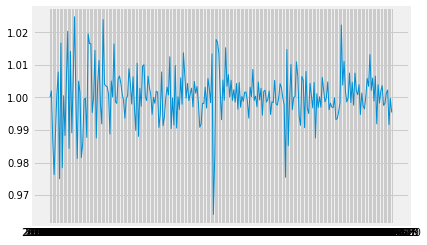

In [79]:
# calculate daily benchmark_data returns
# ... YOUR CODE FOR TASK 6 HERE ...
MKT_d = [1]
SnP =list(benchmark_data['S&P 500'])
SnP
for i in range(1,len(SnP)):
    MKT_d.append(SnP[i]/SnP[i-1])
benchmark_data['MKT_d'] = MKT_d

# plot the daily returns
# ... YOUR CODE FOR TASK 6 HERE ...
plt.plot('Date', 'MKT_d', data=benchmark_data, linewidth=1)

# summarize the daily returns
# ... YOUR CODE FOR TASK 6 HERE ...


## 7. Calculating Excess Returns for Amazon and Facebook vs. S&P 500
<p>Next, we need to calculate the relative performance of stocks vs. the S&amp;P 500 benchmark. This is calculated as the difference in returns between <code>stock_returns</code> and <code>sp_returns</code> for each day.</p>

Amazon Excess Returns   Facebook Excess Returns


(0.0003584679766486093, 0.00016693740402454942)

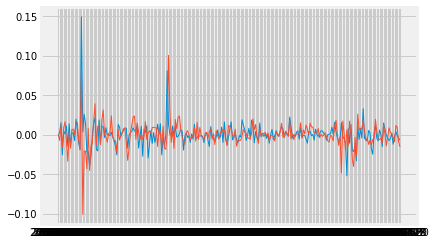

In [89]:
# calculate the difference in daily returns

FBdifference = []
for list1_i, list2_i in zip(FB_d, MKT_d) :
    FBdifference.append(list1_i-list2_i)
AMZNdifference = []
for list1_i, list2_i in zip(AMZN_d, MKT_d) :
    AMZNdifference.append(list1_i-list2_i)

ax.set(facecolor = "orange")
plt.plot(stock_data['Date'], FBdifference, linewidth=1)    
plt.plot(stock_data['Date'], AMZNdifference, linewidth=1)    

# summarize the excess_returns
print('Amazon Excess Returns' + "   " +"Facebook Excess Returns")
np.mean(AMZNdifference), np.mean(FBdifference)

## 8. The Sharpe Ratio, Step 1: The Average Difference in Daily Returns Stocks vs S&P 500
<p>Now we can finally start computing the Sharpe Ratio. First we need to calculate the average of the <code>excess_returns</code>. This tells us how much more or less the investment yields per day compared to the benchmark.</p>

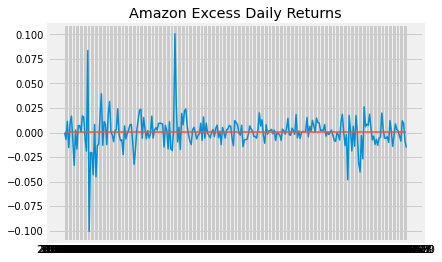

In [95]:
# calculate the mean of excess_returns 
# ... YOUR CODE FOR TASK 8 HERE ...
#avg_excess_return = ...

# plot avg_excess_returns
plt.title('Amazon Excess Daily Returns')
plt.plot(stock_data['Date'], AMZNdifference, linewidth=1.5)
plt.plot(stock_data['Date'], [np.mean(AMZNdifference)]*len(stock_data), linewidth=1.5)

## 9. The Sharpe Ratio, Step 2: Standard Deviation of the Return Difference
<p>It looks like there was quite a bit of a difference between average daily returns for Amazon and Facebook.</p>
<p>Next, we calculate the standard deviation of the <code>excess_returns</code>. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&amp;P 500.</p>

In [112]:
# calculate the standard deviations
AMZNsd_excess_return = np.std(AMZNdifference)
FBsd_excess_return = np.std(FBdifference)

AMZNsd_excess_return, FBsd_excess_return

(0.0160619279938641, 0.015377714304287145)

## 10. Putting it all together
<p>Now we just need to compute the ratio of <code>avg_excess_returns</code> and <code>sd_excess_returns</code>. The result is now finally the <em>Sharpe ratio</em> and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.</p>
<p>The Sharpe Ratio is often <em>annualized</em> by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √252</p>

In [111]:
# calculate the daily sharpe ratio
AMZNdaily_sharpe_ratio = np.mean(AMZNdifference)/AMZNsd_excess_return
FBdaily_sharpe_ratio = np.mean(FBdifference)/FBsd_excess_return

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
AMZNannual_sharpe_ratio = annual_factor**AMZNdaily_sharpe_ratio-1
FBannual_sharpe_ratio = annual_factor**FBdaily_sharpe_ratio-1


AMZNannual_sharpe_ratio, FBannual_sharpe_ratio

(0.0636458972108942, 0.03046812624929207)

## 11. Conclusion
<p>Given the two Sharpe ratios, which investment should we go for? In 2016, Amazon had a Sharpe ratio twice as high as Facebook. This means that an investment in Amazon returned twice as much compared to the S&amp;P 500 for each unit of risk an investor would have assumed. In other words, in risk-adjusted terms, the investment in Amazon would have been more attractive.</p>
<p>This difference was mostly driven by differences in return rather than risk between Amazon and Facebook. The risk of choosing Amazon over FB (as measured by the standard deviation) was only slightly higher so that the higher Sharpe ratio for Amazon ends up higher mainly due to the higher average daily returns for Amazon. </p>
<p>When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis.</p>

In [107]:
buy_amazon = True